# Initial Value Problems for PDEs

## The Diffusion Equation

The diffusion equation
\begin{equation}
\dfrac{\partial c}{\partial t} = D\nabla^2 c
\end{equation}
can be rewritten as
\begin{equation}
\dfrac{\partial c}{\partial\tau} = \nabla^2 c,
\end{equation}
where $\tau = Dt$ is a time-like variable rescaled by the <em>diffusion constant</em> $D$.

To solve for $c(\vec{r}, t)$ numerically, we need to first discretize both space and time. That is,
\begin{equation}
\tau = \tau_0 + m \Delta\tau, \quad m = 0, 1, \dots, M,
\end{equation}
and
\begin{equation}
\vec{r} = \vec{r}_0 + n_1 \vec{a}_1 + n_2 \vec{a}_2 + n_3 \vec{a}_3,
\end{equation}
where $\vec{a}_1 = \Delta x\, \hat{x}$, $\vec{a}_2 = \Delta y\, \hat{y}$, $\vec{a}_3 = \Delta z\, \hat{z}$, and $n_1 = 0, 1, \dots, N_1$, $n_2 = 0, 1, \dots, N_2$, $n_3 = 0, 1, \dots, N_3$.

Next, we need to approximate the partial derivatives,
\begin{equation}
\begin{aligned}
\dfrac{\partial c}{\partial\tau} &\approx \dfrac{c(\vec{r}, \tau + \Delta\tau) - c(\vec{r}, \tau)}{\Delta\tau} \\
&= \dfrac{c(n_1, n_2, n_3, m + 1) - c(n_1, n_2, n_3, m)}{\Delta\tau},
\end{aligned}
\end{equation}
and
\begin{equation}
\begin{aligned}
\nabla^2 c &\approx \dfrac{\partial^2 c}{\partial x^2} + \dfrac{\partial^2 c}{\partial y^2} + \dfrac{\partial^2 c}{\partial z^2} \\
&= \dfrac{c(n_1+1, n_2, n_3, m) - 2c(n_1, n_2, n_3, m) + c(n_1 - 1, n_2, n_3, m)}{\Delta x^2} + {} \\
&\quad\ \dfrac{c(n_1, n_2+1, n_3, m) - 2c(n_1, n_2, n_3, m) + c(n_1, n_2-1, n_3, m)}{\Delta y^2} + {} \\
&\quad\ \dfrac{c(n_1, n_2, n_3+1, m) - 2c(n_1, n_2, n_3, m) + c(n_1, n_2, n_3-1, m)}{\Delta z^2}.
\end{aligned}
\end{equation}

Combining the two discretized partial derivatives, we have
\begin{equation}
\begin{aligned}
c(n_1, n_2, n_3, m+1) &= c(n_1, n_2, n_3, m) + {} \\
&\quad\ \dfrac{\Delta\tau}{\Delta x^2} \left[c(n_1+1, n_2, n_3, m) - 2c(n_1, n_2, n_3, m) + c(n_1 - 1, n_2, n_3, m)\right] + {} \\
&\quad\ \dfrac{\Delta\tau}{\Delta y^2} \left[c(n_1, n_2+1, n_3, m) - 2c(n_1, n_2, n_3, m) + c(n_1, n_2-1, n_3, m)\right] + {} \\
&\quad\ \dfrac{\Delta\tau}{\Delta z^2} \left[c(n_1, n_2, n_3+1, m) - 2c(n_1, n_2, n_3, m) + c(n_1, n_2, n_3-1, m)\right].
\end{aligned}
\end{equation}

This numerical integration scheme is called <em>forward time central space</em> (FTCS). It is one of the most commonly used scheme in the <em>finite difference</em> family of methods for parabolic PDEs, even though it is not the most accurate.

## Diffusion Equation in One Space and One Time

For the diffusion equation in one space and one time, the update rule would be
\begin{equation}
c(n,m+1) = c(n,m) + \dfrac{\Delta\tau}{\Delta x^2} \left[ c(n+1,m) - 2c(n,m) + c(n-1,m) \right].
\end{equation}

To solve the diffusion equation in one space and one time, we need to specify an initial condition $c(x, t=0) = f(x)$, where $f(x)$ can be any well-behaved function of $x$, i.e. does not blow up.

We will also need to impose boundary conditions. For example, if we want to solve the diffusion equation within the domain $-\dfrac{L}{2} \leq x \leq \dfrac{L}{2}$, then we need to specify $c(x = \pm\dfrac{L}{2}, t) = g_{\pm}(t)$ for all times.

For concreteness sake, let us say we take $L = 6$, so that we are solving the diffusion equation for $-3 \leq x \leq 3$. We can then impose the boundary condition $c(x = \pm 3, t) = 0$.

Physically, this means that whatever it is that is diffusing through $-3 \leq x \leq 3$, it disappears when it reaches $x = \pm 3$.

We can also choose the initial condition to be
\begin{equation}
c(x, t=0) = \begin{cases}
1, & -1 \leq x \leq 1; \\
0, & \text{otherwise}. \end{cases}
\end{equation}
This tells us that the diffusing substance is initially distributed uniformly between $x = -1$ and $x = 1$.

Let us now set up the Python script for this simulation.

First, we need to import the relevant modules.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Next, we need to initialize the simulation parameters.

In [5]:
dt = 0.1
dx = 0.5
L = 6.0
M = 101
N = 25

Following this, we allocate memory to the arrays we need in our simulation.

In [6]:
t = np.linspace(0, 10, M)
x = np.linspace(-L/2, L/2, N)
c = np.zeros((M, N))
(t, x)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. ]),
 array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
        -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
         1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ]))

Once memory allocation is done, we must impose initial conditions $\dots$

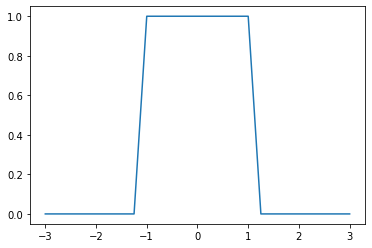

In [7]:
for n in range(N):
    if (x[n] >= -1.0)*(x[n] <= 1.0):
        c[0,n] = 1.0
c[0,:]
plt.plot(x, c[0,:])
plt.show()

$\dots$ followed by boundary conditions.

In [8]:
for m in range(M):
    c[m,0] = 0.0
    c[m,N-1] = 0.0

In practice, because we have already initialized the array <tt>c</tt> to zero, there is no need impose the boundary condition. Nevertheless, we show it just in case the boundary condition we wish to maintain is not the trivial one.

Finally, we are ready to implement the FTCS update to solve the initial value problem for the diffusion equation.

[Python code]

In [9]:
# FTCS update from m = 1 to m = M-1
for m in range(1, M):
    # go through n = 1 to n = N-2, because n = 0 and n = N-1 are
    # boundary conditions we have already fixed
    for n in range(1,N-1):
        c[m,n] = c[m-1,n] + (dt/(dx*dx))*(c[m-1,n+1] - 2.0*c[m-1,n] + c[m-1,n-1])
        

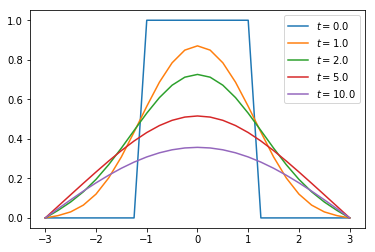

In [20]:
plt.plot(x, c[0,:], label=r'$t = 0.0$')
plt.plot(x, c[11,:], label=r'$t = 1.0$')
plt.plot(x, c[21,:], label=r'$t = 2.0$')
plt.plot(x, c[51,:], label=r'$t = 5.0$')
plt.plot(x, c[-1,:], label=r'$t = 10.0$')
plt.legend(loc='upper right')
plt.show()

## The Wave Equation in One Space and One Time

Another linear PDE where we would encounter initial value problems is the wave equation.

For simplicity sake, let us consider the wave equation in one space and one time,
\begin{equation}
\dfrac{\partial^2 y}{\partial x^2} + \dfrac{1}{v^2}\dfrac{\partial^2 y}{\partial t^2} = 0.
\end{equation}

This can represent, for example, the transverse displacement $y(x, t)$ of a string stretched along the $x$ direction, such that $v = \sqrt{T/\mu}$ is the speed of the wave on the string. Here $T$ is the tension in the string, and $\mu$ is the mass per unit length of the string.

Again, to solve this wave equation numerically, we need to discretize time
\begin{equation}
t = t_0 + m\Delta t, \quad m = 0, 1, \dots, M,
\end{equation}
and space
\begin{equation}
x = x_0 + n\Delta x, \quad n = 0, 1, \dots, N.
\end{equation}

The natural approximation for $\partial^2 y/\partial x^2$ is again the central difference
\begin{equation}
\dfrac{\partial^2 y}{\partial x^2} \approx 
\dfrac{y(n+1, m) - 2y(n, m) + y(n-1, m)}{\Delta x^2}.
\end{equation}

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
# initialize simulation parameters
dt = 0.1
dx = 0.1
v = 1.0
M = 51
N = 21
# memory allocation
x = np.linspace(-1.0, 1.0, N)
t = np.linspace(0.0, 5.0, M)
y = np.zeros((M, N))
# initial condition for displacement
for n in range(N):
    if x[n] < 0.0:
        y[0, n] = 0.5*x[n] + 0.5
    else:
        y[0, n] = -0.5*x[n] + 0.5
# initial condition for velocity
ymdt = y[0, :]
# solve first for y[1,:]
for n in range(1,N-1):
    y[1,n] = ymdt[n] + (2.0*v*v*dt*dt/(dx*dx))*(y[0,n+1]-2.0*y[0,n]+y[0,n-1])
# update for the rest
for m in range(2,M):
    for n in range(1,N-1):
        y[m,n] = y[m-2,n] + (2.0*v*v*dt*dt/(dx*dx))*(y[m-1,n+1]-2.0*y[m-1,n]+y[m-1,n-1])
